In [1]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, distance
from sklearn_extra.cluster import KMedoids
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
data = pd.read_excel("Database_for_cluster.xlsx")

In [4]:
data.head(10)

,Актор,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,Место исторического нарратива,...,Отношения “центр - регионы”: степень учёта интересов регионов,"Позиция по изменениям, реформам по направлениям политики",Политическое сотрудничество с разными странами,Политическое участие граждан,Распределение полномочий внутри федеральных органов власти,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество
0,Аксаков А. Г.,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Алимова О. Н.,-1,1,-1,1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,1,1,-1
2,Андрейченко А. В.,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
3,Арефьев Н. В.,-1,-1,1,-1,1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
4,Аршинова А. И.,1,1,-1,1,-1,-1,1,1,1,...,-1,1,1,-1,-1,-1,-1,1,-1,1
5,Афонин Ю. В.,-1,-1,1,1,1,1,-1,-1,1,...,-1,1,1,1,-1,-1,-1,1,1,1
6,Белых И. В.,1,1,1,1,1,1,1,1,-1,...,-1,1,1,1,-1,-1,-1,1,1,1
7,Берулава М. Н.,-1,1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
8,Бессараб С. В.,1,1,1,1,-1,1,1,1,-1,...,-1,1,1,-1,-1,-1,-1,1,1,1
9,Бессарабов Д. В.,1,1,1,-1,1,-1,1,1,-1,...,-1,-1,1,1,-1,-1,-1,-1,-1,1


In [5]:
data_to_cluster = data.drop(columns = ["Актор"])
data_to_cluster.head(10)

,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,Место исторического нарратива,Наиболее общие ценностные приоритеты,...,Отношения “центр - регионы”: степень учёта интересов регионов,"Позиция по изменениям, реформам по направлениям политики",Политическое сотрудничество с разными странами,Политическое участие граждан,Распределение полномочий внутри федеральных органов власти,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество
0,1,1,1,1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,-1,1,-1,1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,1,1,-1
2,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
3,-1,-1,1,-1,1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
4,1,1,-1,1,-1,-1,1,1,1,1,...,-1,1,1,-1,-1,-1,-1,1,-1,1
5,-1,-1,1,1,1,1,-1,-1,1,1,...,-1,1,1,1,-1,-1,-1,1,1,1
6,1,1,1,1,1,1,1,1,-1,1,...,-1,1,1,1,-1,-1,-1,1,1,1
7,-1,1,1,1,1,1,-1,-1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,-1,1,1,1,-1,1,...,-1,1,1,-1,-1,-1,-1,1,1,1
9,1,1,1,-1,1,-1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,-1,-1,-1,1


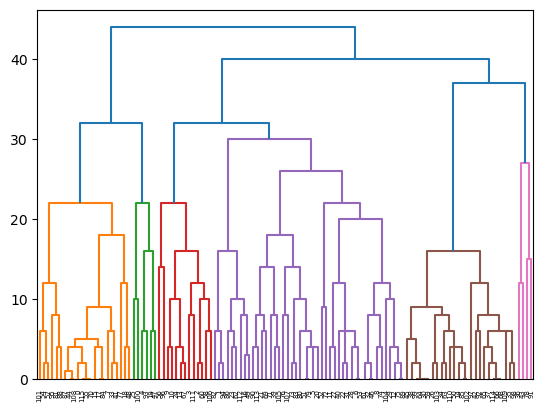

In [6]:
hc2 = linkage(data_to_cluster, method = "complete", metric = "cityblock")
dendrogram(hc2);

In [18]:
clusters_ward = cut_tree(hc2, n_clusters = 5).reshape(-1, )
print(clusters_ward)

[0 1 1 1 2 1 1 0 1 1 1 1 1 1 3 0 1 0 0 2 1 1 1 1 1 2 3 1 1 1 3 1 1 0 3 3 4
 3 3 1 1 0 3 4 0 3 1 2 0 1 3 1 1 1 0 0 1 0 1 3 1 1 1 3 3 3 3 1 3 1 0 1 1 1
 1 1 1 0 4 1 1 0 1 1 0 3 1 0 0 1 1 4 3 2 1 0 1 3 3 3 2 0 3 3 1 1 1 1 0 3 3
 1 1 1 3 0]


In [19]:
data['clusters_ward'] = clusters_ward

In [9]:
data['clusters_ward'].value_counts()

1    45
4    26
0    22
2    13
3     6
5     4
Name: clusters_ward, dtype: int64

In [11]:
data.head(10)

,Актор,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,Место исторического нарратива,...,"Позиция по изменениям, реформам по направлениям политики",Политическое сотрудничество с разными странами,Политическое участие граждан,Распределение полномочий внутри федеральных органов власти,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество,clusters_ward
0,Аксаков А. Г.,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,Алимова О. Н.,-1,1,-1,1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,1,1,-1,1
2,Андрейченко А. В.,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,1,2
3,Арефьев Н. В.,-1,-1,1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,1,2
4,Аршинова А. И.,1,1,-1,1,-1,-1,1,1,1,...,1,1,-1,-1,-1,-1,1,-1,1,3
5,Афонин Ю. В.,-1,-1,1,1,1,1,-1,-1,1,...,1,1,1,-1,-1,-1,1,1,1,1
6,Белых И. В.,1,1,1,1,1,1,1,1,-1,...,1,1,1,-1,-1,-1,1,1,1,1
7,Берулава М. Н.,-1,1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,0
8,Бессараб С. В.,1,1,1,1,-1,1,1,1,-1,...,1,1,-1,-1,-1,-1,1,1,1,1
9,Бессарабов Д. В.,1,1,1,-1,1,-1,1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,1,2


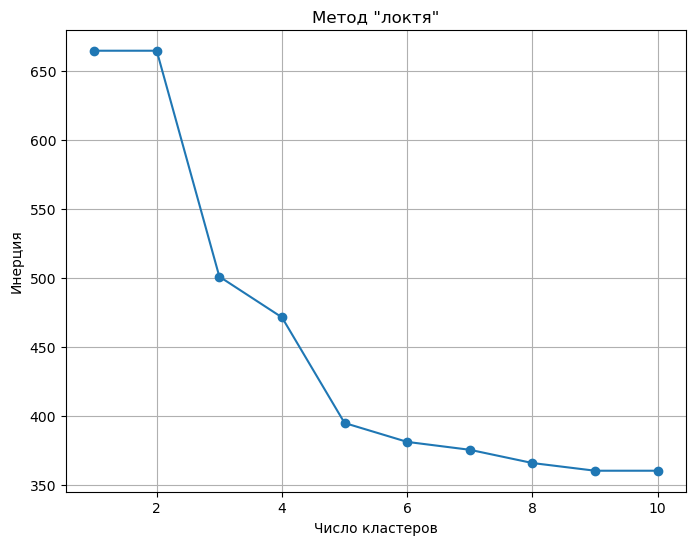

In [14]:
inertia = []

for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=1234)
    kmedoids.fit(data_to_cluster)
    inertia.append(kmedoids.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.title('Метод "локтя"')
plt.grid(True)
plt.show()

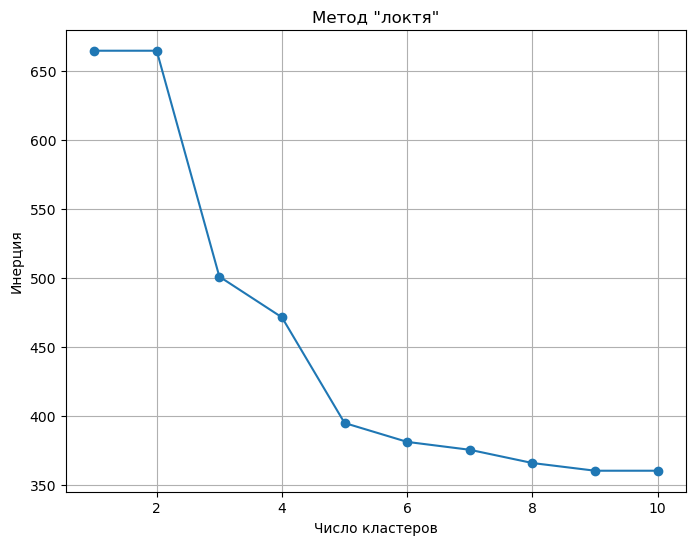

In [15]:
inertia = []

for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=3412)
    kmedoids.fit(data_to_cluster)
    inertia.append(kmedoids.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.title('Метод "локтя"')
plt.grid(True)
plt.show()

In [15]:
kmedoids = KMedoids(n_clusters=5, random_state=1234).fit(data_to_cluster)
labels = kmedoids.labels_
labels

array([0, 3, 2, 3, 2, 4, 1, 0, 1, 2, 2, 1, 1, 2, 3, 0, 1, 0, 0, 0, 4, 1,
       1, 1, 2, 2, 3, 1, 1, 0, 3, 1, 1, 0, 3, 3, 2, 2, 3, 1, 1, 0, 2, 0,
       0, 3, 1, 0, 0, 1, 3, 4, 4, 1, 0, 0, 1, 0, 2, 3, 2, 1, 1, 3, 3, 3,
       3, 2, 3, 1, 0, 4, 4, 4, 1, 0, 4, 0, 4, 4, 4, 0, 3, 4, 0, 3, 1, 0,
       0, 0, 1, 4, 2, 1, 3, 0, 3, 3, 3, 3, 2, 0, 3, 3, 0, 1, 2, 4, 0, 3,
       3, 2, 1, 1, 3, 0])

In [16]:
data['clusters_kmedoids'] = labels

In [14]:
data.head(5)

,Актор,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,Место исторического нарратива,...,Политическое сотрудничество с разными странами,Политическое участие граждан,Распределение полномочий внутри федеральных органов власти,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество,clusters_ward,clusters_kmedoids
0,Аксаков А. Г.,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1,Алимова О. Н.,-1,1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,1,-1,1,3
2,Андрейченко А. В.,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,1,2,2
3,Арефьев Н. В.,-1,-1,1,-1,1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,1,2,3
4,Аршинова А. И.,1,1,-1,1,-1,-1,1,1,1,...,1,-1,-1,-1,-1,1,-1,1,3,5


In [10]:
data['ind'] = data.loc[:, 
                       "Возможности для получения высшего образования": "Экономическое международное сотрудничество"].apply(sum, axis = 1)

In [14]:
data.groupby("clusters_kmedoids")["ind"].agg(["count", "mean", "min", "max"])

,count,mean,min,max
clusters_kmedoids,,,,
0,28,15.750000,6,22
1,26,4.807692,-4,14
2,16,-9.750000,-16,-2
3,28,-14.535714,-22,-4
4,14,2.285714,-4,10
5,4,3.500000,0,10


In [20]:
cluster0_ward = data[data["clusters_ward"] == 0]
cluster1_ward = data[data["clusters_ward"] == 1]
cluster2_ward = data[data["clusters_ward"] == 2]
cluster3_ward = data[data["clusters_ward"] == 3]
cluster4_ward = data[data["clusters_ward"] == 4]
cluster0_ward

,Актор,Возможности для получения высшего образования,Грамотность населения,Дихотомия “личность - государство”,Дихотомия “личность - коллектив” (приоритетность развития),Западная риторика,Идеологическая ориентация аргументов,Качество образования,Критика власти,Место исторического нарратива,...,Политическое участие граждан,Распределение полномочий внутри федеральных органов власти,Распределение полномочий между федеральными и региональными органами власти,Способ принятия решений - представительство/самостоя тельное решение уполномоченными органами,"Ценности, связанные с материальным благосостоянием граждан","Ценности, связанные с уровнем развития общества",Экономическое международное сотрудничество,clusters_ward,ind,clusters_kmedoids
0,Аксаков А. Г.,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,1,0,20,0
7,Берулава М. Н.,-1,1,1,1,1,1,-1,-1,1,...,1,1,1,1,1,1,1,0,16,0
15,Вострецов С. А.,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,20,0
17,Вяткин Д. Ф.,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,20,0
18,Гаврилов С. А.,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,1,1,-1,0,14,0
33,Емельянов М. В.,1,1,1,1,1,1,1,-1,1,...,1,1,1,1,1,1,1,0,20,0
41,Иванов Н. Н.,1,1,1,1,1,1,1,-1,1,...,1,1,1,1,1,1,1,0,18,0
44,Исаев А. К.,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,20,0
48,Кармазина Р. В.,1,1,1,1,-1,1,1,1,-1,...,-1,1,1,1,1,1,-1,0,10,0
54,Кравец А. А.,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,18,0


In [22]:
cluster0_kmedoids = data[data["clusters_kmedoids"] == 0]
cluster1_kmedoids = data[data["clusters_kmedoids"] == 1]
cluster2_kmedoids = data[data["clusters_kmedoids"] == 2]
cluster3_kmedoids = data[data["clusters_kmedoids"] == 3]
cluster4_kmedoids = data[data["clusters_kmedoids"] == 4]

In [24]:
print("0", sorted(cluster0_ward['Актор']))
print("1", sorted(cluster1_ward['Актор']))
print("2", sorted(cluster2_ward['Актор']))
print("3", sorted(cluster3_ward['Актор']))
print("4", sorted(cluster4_ward['Актор']))

0 ['Аксаков А. Г.', 'Берулава М. Н.', 'Вострецов С. А.', 'Вяткин Д. Ф.', 'Гаврилов С. А.', 'Емельянов М. В.', 'Иванов Н. Н.', 'Исаев А. К.', 'Кармазина Р. В.', 'Кравец А. А.', 'Красов А. Л.', 'Кузьмин М. В.', 'Никонов В. А.', 'Панина Е. В.', 'Пивненко В. Н.', 'Пятикоп А. И.', 'Рыжак Н. И.', 'Сапко И. В.', 'Слуцкий Л. Э.', 'Толстой П. О.', 'Шаманов В. А.', 'Яровая И. А.']
1 ['Алимова О. Н.', 'Андрейченко А. В.', 'Арефьев Н. В.', 'Афонин Ю. В.', 'Белых И. В.', 'Бессараб С. В.', 'Бессарабов Д. В.', 'Бугера М. Е.', 'Бурматов В. В.', 'Быков О. П.', 'Власов В. М.', 'Выборный А. Б.', 'Ганзя В. А.', 'Гартунг В. К.', 'Гетта А. А.', 'Гильмутдинов И. И.', 'Грешневиков А. Н.', 'Дамдинов А. В.', 'Дегтярёв М. В.', 'Дивинский И. Б.', 'Дорохин П. С.', 'Драпеко Е. Г.', 'Затулин К. Ф.', 'Зюганов Г. А.', 'Казакова О. М.', 'Касаева Т. В.', 'Кашин В. И.', 'Коломейцев Н. В.', 'Кононов В. М.', 'Крашенинников П. В.', 'Куринный А. В.', 'Макаров А. М.', 'Марданшин Р. М.', 'Марьяш И. Е.', 'Неверов С. И.', 'Никол

In [25]:
print("0", sorted(cluster0_kmedoids['Актор']))
print("1", sorted(cluster1_kmedoids['Актор']))
print("2", sorted(cluster2_kmedoids['Актор']))
print("3", sorted(cluster3_kmedoids['Актор']))
print("4", sorted(cluster4_kmedoids['Актор']))

0 ['Аксаков А. Г.', 'Берулава М. Н.', 'Вострецов С. А.', 'Вяткин Д. Ф.', 'Гаврилов С. А.', 'Газзаев В. Г.', 'Дивинский И. Б.', 'Емельянов М. В.', 'Иванов Н. Н.', 'Ионин Д. А.', 'Исаев А. К.', 'Калашников Л. И.', 'Кармазина Р. В.', 'Кравец А. А.', 'Красов А. Л.', 'Кузьмин М. В.', 'Никонов В. А.', 'Онищенко Г. Г.', 'Панина Е. В.', 'Пивненко В. Н.', 'Пятикоп А. И.', 'Рыжак Н. И.', 'Сапко И. В.', 'Сафаралиев Г. К.', 'Слуцкий Л. Э.', 'Толстой П. О.', 'Хинштейн А. Е.', 'Шаманов В. А.', 'Яровая И. А.']
1 ['Белых И. В.', 'Бессараб С. В.', 'Бурматов В. В.', 'Быков О. П.', 'Выборный А. Б.', 'Гартунг В. К.', 'Гетта А. А.', 'Гильмутдинов И. И.', 'Дамдинов А. В.', 'Дегтярёв М. В.', 'Дорохин П. С.', 'Драпеко Е. Г.', 'Затулин К. Ф.', 'Зюганов Г. А.', 'Казакова О. М.', 'Касаева Т. В.', 'Кононов В. М.', 'Крашенинников П. В.', 'Марданшин Р. М.', 'Марьяш И. Е.', 'Николаев О. А.', 'Окунева О. В.', 'Ремезков А. А.', 'Сватковский Д. В.', 'Силанов А. Н.', 'Чепа А. В.', 'Шурчанов В. С.', 'Щапов М. В.']
2 ['Ан

In [26]:
set0_kmedoids = set(cluster0_kmedoids['Актор'])
set1_kmedoids = set(cluster1_kmedoids['Актор'])
set2_kmedoids = set(cluster2_kmedoids['Актор'])
set3_kmedoids = set(cluster3_kmedoids['Актор'])
set4_kmedoids = set(cluster4_kmedoids['Актор'])

In [27]:
set0_ward = set(cluster0_ward['Актор'])
set1_ward = set(cluster1_ward['Актор'])
set2_ward = set(cluster2_ward['Актор'])
set3_ward = set(cluster3_ward['Актор'])
set4_ward = set(cluster4_ward['Актор'])

In [28]:
print(len(set0_ward.intersection(set0_kmedoids)))
print(len(set0_ward.intersection(set1_kmedoids)))
print(len(set0_ward.intersection(set2_kmedoids)))
print(len(set0_ward.intersection(set3_kmedoids)))
print(len(set0_ward.intersection(set4_kmedoids)))

22
0
0
0
0


In [29]:
print(len(set1_ward.intersection(set0_kmedoids)))
print(len(set1_ward.intersection(set1_kmedoids)))
print(len(set1_ward.intersection(set2_kmedoids)))
print(len(set1_ward.intersection(set3_kmedoids)))
print(len(set1_ward.intersection(set4_kmedoids)))

4
27
10
5
12


In [30]:
print(len(set2_ward.intersection(set0_kmedoids)))
print(len(set2_ward.intersection(set1_kmedoids)))
print(len(set2_ward.intersection(set2_kmedoids)))
print(len(set2_ward.intersection(set3_kmedoids)))
print(len(set2_ward.intersection(set4_kmedoids)))

2
1
3
0
0


In [31]:
print(len(set3_ward.intersection(set0_kmedoids)))
print(len(set3_ward.intersection(set1_kmedoids)))
print(len(set3_ward.intersection(set2_kmedoids)))
print(len(set3_ward.intersection(set3_kmedoids)))
print(len(set3_ward.intersection(set4_kmedoids)))

0
0
3
23
0


In [32]:
print(len(set4_ward.intersection(set0_kmedoids)))
print(len(set4_ward.intersection(set1_kmedoids)))
print(len(set4_ward.intersection(set2_kmedoids)))
print(len(set4_ward.intersection(set3_kmedoids)))
print(len(set4_ward.intersection(set4_kmedoids)))

1
0
1
0
2


In [35]:
adjusted_rand_score(labels, clusters_ward) 

0.37588825994954245